In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import json
import sklearn
import lzma
import nltk

from pandas.io.json import json_normalize
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [37]:
#Any global parameters to adjust
plt.rcParams.update({'font.size': 20})

<h1>Phase 3!</h1>
<p>We're really getting down to the wire here. The main focus will be on the machine learning, but if I can afford to, I'll do some immediate linguistics analysis.</p>

<a id="toc"></a>
<h2>Table of Contents</h2>
<ol>
    <li><a href="#loading">Loading the data and Setting Target Subreddits</a></li> 
</ol>

<a id="loading"></a>
<h2>Loading the data and Setting the Target Subreddits</h2>
<p>So first off, we have to load the data. And then we have to set our target subreddits.</p>

In [2]:
redditframe=pd.read_pickle("../data/TokenizedRedditframe.pkl")

In [3]:
above50 = redditframe[redditframe.score >= 50]

In [4]:
targetsubreddits=["relationships", "aww", "nfl", "PrequelMemes", "gaming", "mildlyinteresting", "politics", "Showerthoughts","worldnews","gifs", "StarWars", "funny"]

In [5]:
above50t = above50[above50.subreddit.isin(targetsubreddits)]
above50t.to_pickle("../data/MLdata.pkl")

<p>The data has been loaded and the target subreddits has been set. I pickle them here so that I can scp them onto the CRC server. Let's do this.</p>

<a id="baseline"></a>
<h2>Baseline Machine Learning</h2>
<p>For this section, we'll run machine learning on some basic parameters, to gauge of how progress we have to do. We'll run one run of each, no cross-validation until we get to the grid search. To make things interesting, we'll use multiple machine learning algorithms. First off, we must determine the percentage of each subreddit so that we can see who is the largest, and what value the accuracy score must clear...</p>

In [42]:
for i in targetsubreddits:
    print(len(above50t[above50t.subreddit==i])/len(above50t), i)

0.07834616339706978 relationships
0.044946610379935435 aww
0.12652098336230444 nfl
0.01614104792649615 PrequelMemes
0.08579587782468338 gaming
0.025577352868140054 mildlyinteresting
0.22175316612863175 politics
0.059473553513781974 Showerthoughts
0.123541097591259 worldnews
0.04022845790911348 gifs
0.10566178296498634 StarWars
0.07201390613359822 funny


<p>Politics makes up the largest portion at 22%. Therefore, we must get above 22% for our classifier to even be remotely classified as successful.</p>
<p>Moving on, we'll split the data for a singular basic runs

In [6]:
trainingdata, testingdata, y_train, y_test = train_test_split(above50t["body"], above50t["subreddit"], test_size = 1/5, random_state = 0)

In [22]:
vectorizer = TfidfVectorizer(min_df=2)
model = Pipeline(steps=[('Tfidf', TfidfVectorizer(min_df=2)), ('MNB', MultinomialNB())])

In [23]:
model.fit(trainingdata, y_train)

Pipeline(memory=None,
     steps=[('Tfidf', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=2,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,...rue,
        vocabulary=None)), ('MNB', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [25]:
y_pred = model.predict(testingdata)
cm = pd.crosstab(y_test, y_pred)

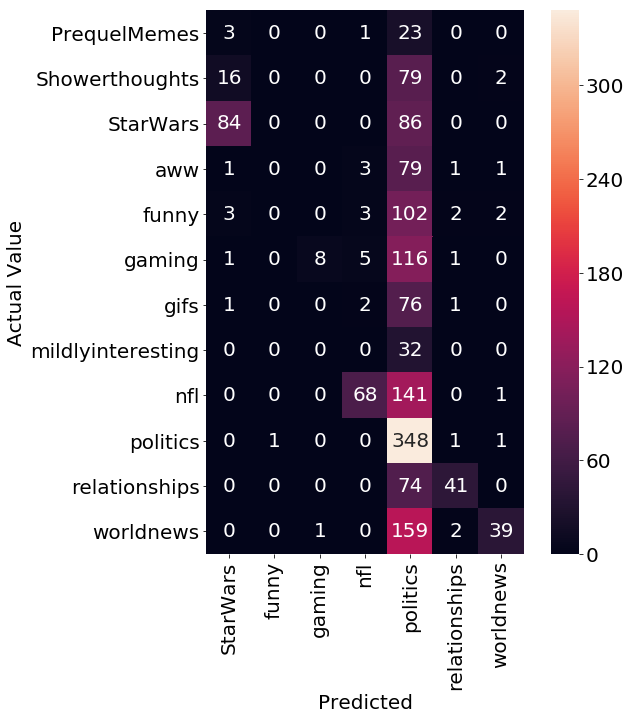

In [26]:
plt.figure(figsize=(10,10))

sns.heatmap(cm, annot=True, fmt='d', square=True, cmap="icefire")
plt.xlabel('Predicted')
plt.ylabel('Actual Value')
plt.show()

In [27]:
sklearn.metrics.accuracy_score(y_test, y_pred)

0.3649906890130354

In [29]:
model = Pipeline(steps=[('Tfidf', TfidfVectorizer(min_df=2)), ('SVC', SVC(kernel='linear', C=1E5))])
svd = SVC(kernel='linear', C=1E5)
model.fit(trainingdata, y_train)

Pipeline(memory=None,
     steps=[('Tfidf', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=2,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,...r', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False))])

In [13]:
y_pred = svd.predict(testingfit)
cm = pd.crosstab(y_test, y_pred)

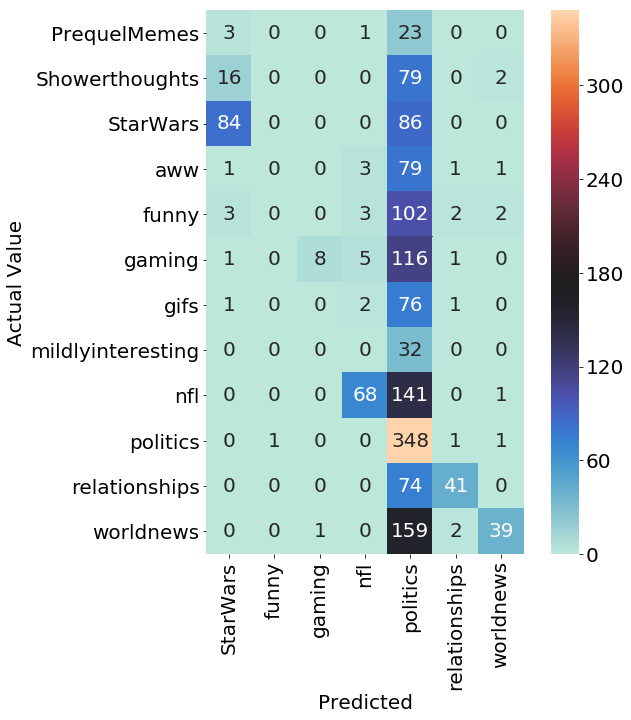

In [30]:
plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True, fmt='d', square=True, cmap="icefire")
plt.xlabel('Predicted')
plt.ylabel('Actual Value')
plt.show()

In [31]:
sklearn.metrics.accuracy_score(y_test, y_pred)

0.3649906890130354

In [32]:
model = Pipeline(steps=[('Tfidf', TfidfVectorizer()), ('MNB', MultinomialNB())])

0.12652098336230444

In [34]:
model.fit(trainingdata, y_train)

Pipeline(memory=None,
     steps=[('Tfidf', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,...rue,
        vocabulary=None)), ('MNB', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [35]:
y_pred = model.predict(testingdata)
cm = pd.crosstab(y_test, y_pred)

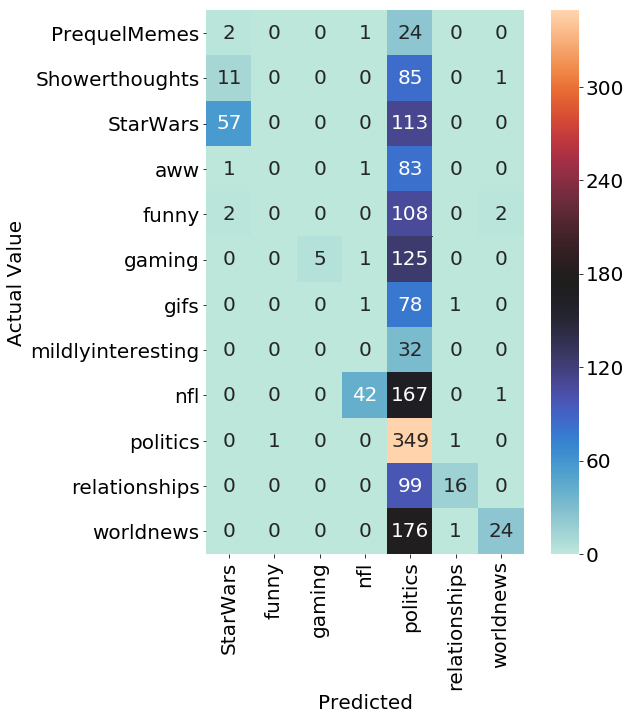

In [38]:
plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True, fmt='d', square=True, cmap="icefire")
plt.xlabel('Predicted')
plt.ylabel('Actual Value')
plt.show()

AskReddit               6735
nba                     1813
politics                1786
The_Donald              1435
nfl                     1019
worldnews                995
StarWars                 851
videos                   766
movies                   760
soccer                   698
gaming                   691
news                     689
survivor                 664
todayilearned            653
relationships            631
CFB                      621
leagueoflegends          596
funny                    580
pics                     553
SquaredCircle            536
Showerthoughts           479
hiphopheads              441
BlackPeopleTwitter       404
aww                      362
baseball                 332
gifs                     324
europe                   323
DestinyTheGame           321
WTF                      321
Overwatch                302
traaaaaaannnnnnnnnns     286
LivestreamFail           271
hockey                   255
MMA                      254
PUBATTLEGROUND